In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
df = pd.read_csv('C:\\Users\Administrator\Desktop\medical.csv',sep=',')

In [3]:
df['over_weight'] = ((df['weight']/(df['height']*df['height']/100)*100)>25).astype(int)
df['cholesterol'] = (df['cholesterol']>1).astype(int)
df['gluc'] = (df['gluc']>1).astype(int)
cat_plot = df.melt(id_vars=['cardio'],value_vars=sorted(['cholesterol', 'gluc', 'smoke', 'alco', 'active', 'over_weight']))

C:\Users\Administrator\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


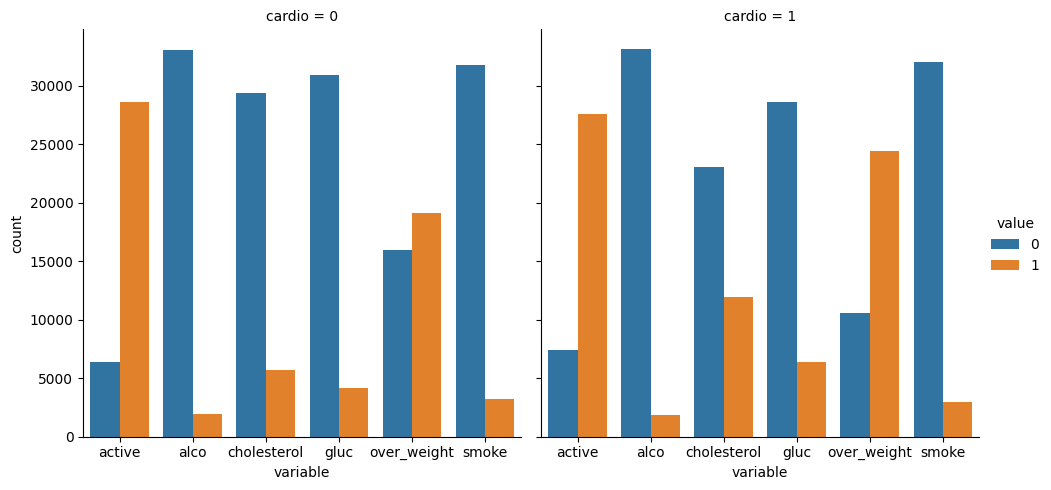

In [4]:
plot = sns.catplot(data=cat_plot,kind='count',x='variable',hue='value',col='cardio')

In [5]:
heatmap = df[(df['ap_lo']<=df['ap_hi'])&(df['height']>=df['height'].quantile(0.025)) & (df['height']<=df['height'].quantile(0.975))
          &(df['weight']>=df['weight'].quantile(0.025)) & (df['weight']<=df['weight'].quantile(0.975))]

<Axes: >

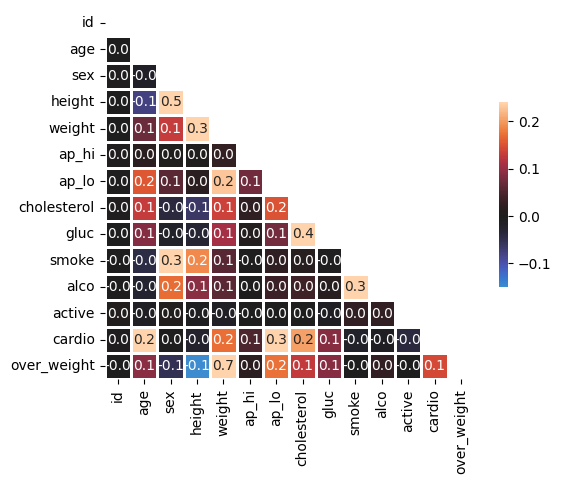

In [6]:
corr = heatmap.corr()
mask = np.triu(corr)
sns.heatmap(corr,annot=True,fmt='.1f', linewidths=1, mask=mask, 
        vmax=0.24, center=0, square=True, cbar_kws={'shrink':0.5})